# Tasks
1.	Data Cleaning and Preparation:

In [1]:
import pandas as pd

●	Load the dataset into a DataFrame or equivalent data structure.

In [2]:
df = pd.read_csv('Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


●	Handle missing values appropriately (e.g., imputation, deletion).

In [5]:
df.fillna(df.mean(),inplace=True)

In [6]:
df.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


●	Detect and treat outliers if necessary.

Inter Quartile range(IQR)
- Q1 = 25% of data
- Q3 = 75% of data
- IQR = Q3-Q1
- lower = Q1 - 1.5*IQR
- upper = Q3 + 1.5*IQR

values before lower and after upper are considered as outliers

In [8]:
df_col = df.columns
df_col

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [ ]:
import numpy as np
iqr = []
for col in df_col:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr.append(IQR)
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    Outlier_col = df[col][(df[col] > upper) | (df[col]<lower)]
    print(f"The Total no. of outliers in col - {col} are: ",len(Outlier_col))
    ## Handling Outliers
    # df[col] = np.where(df[col] > upper,upper,
    #                    np.where(df[col]<lower,lower,df[col]))

    # Removing Outliers
    df = df[(df[col]>=lower) & (df[col]<=upper)]

print("New Datasize:",df.shape)


The Total no. of outliers in col - LB are:  10
The Total no. of outliers in col - AC are:  43
The Total no. of outliers in col - FM are:  330
The Total no. of outliers in col - UC are:  12
The Total no. of outliers in col - DL are:  96
The Total no. of outliers in col - DS are:  103
The Total no. of outliers in col - DP are:  181
The Total no. of outliers in col - ASTV are:  6
The Total no. of outliers in col - MSTV are:  51
The Total no. of outliers in col - ALTV are:  134
The Total no. of outliers in col - MLTV are:  42
The Total no. of outliers in col - Width are:  9
The Total no. of outliers in col - Tendency are:  7
The Total no. of outliers in col - NSP are:  192
New Datasize: (910, 14)


In [10]:
iqr

[14.0,
 0.0055981864999999995,
 0.002515723,
 0.004333013,
 0.0033821915000000003,
 0.0,
 0.0,
 28.0,
 0.8,
 15.636115184364213,
 5.525,
 53.0,
 1.0,
 0.0]

# 2.	Statistical Summary:
●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

In [11]:
stas_summary = df.agg(['mean','median','std']).T
stas_summary['IQR'] = np.array(iqr)
stas_summary

,mean,median,std,IQR
LB,132.225768,133.000000,9.429798,14.000000
AC,0.003879,0.003025,0.003723,0.005598
FM,0.000589,0.000000,0.001308,0.002516
UC,0.004890,0.004983,0.002690,0.004333
DL,0.001521,0.000000,0.002262,0.003382
DS,0.000000,0.000000,0.000000,0.000000
DP,0.000000,0.000000,0.000000,0.000000
ASTV,42.964103,42.000000,15.143842,28.000000
MSTV,1.217347,1.200000,0.500962,0.800000
ALTV,4.627715,0.000000,8.737284,15.636115


●	Highlight any interesting findings from this summary

1)Most variables (e.g., LB, AC, FM, UC) have mean ≈ median → distributions are fairly symmetric.

2)Some variables (e.g., ASTV, ALTV, MLTV, Width) show large IQR and standard deviation, indicating high variability.

3)Columns like DS, DP, Tendency, NSP have become constant (no variance) after outlier removal → they provide no useful information.

4)A few features show mean ≠ median → suggesting skewed distributions.

5)Variables with very different scales (e.g., LB in 100s vs. MSTV in small decimals) may need standardization before modeling.


# 3.	Data Visualization

●	Create histograms or boxplots to visualize the distributions of various numerical variables.

In [12]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

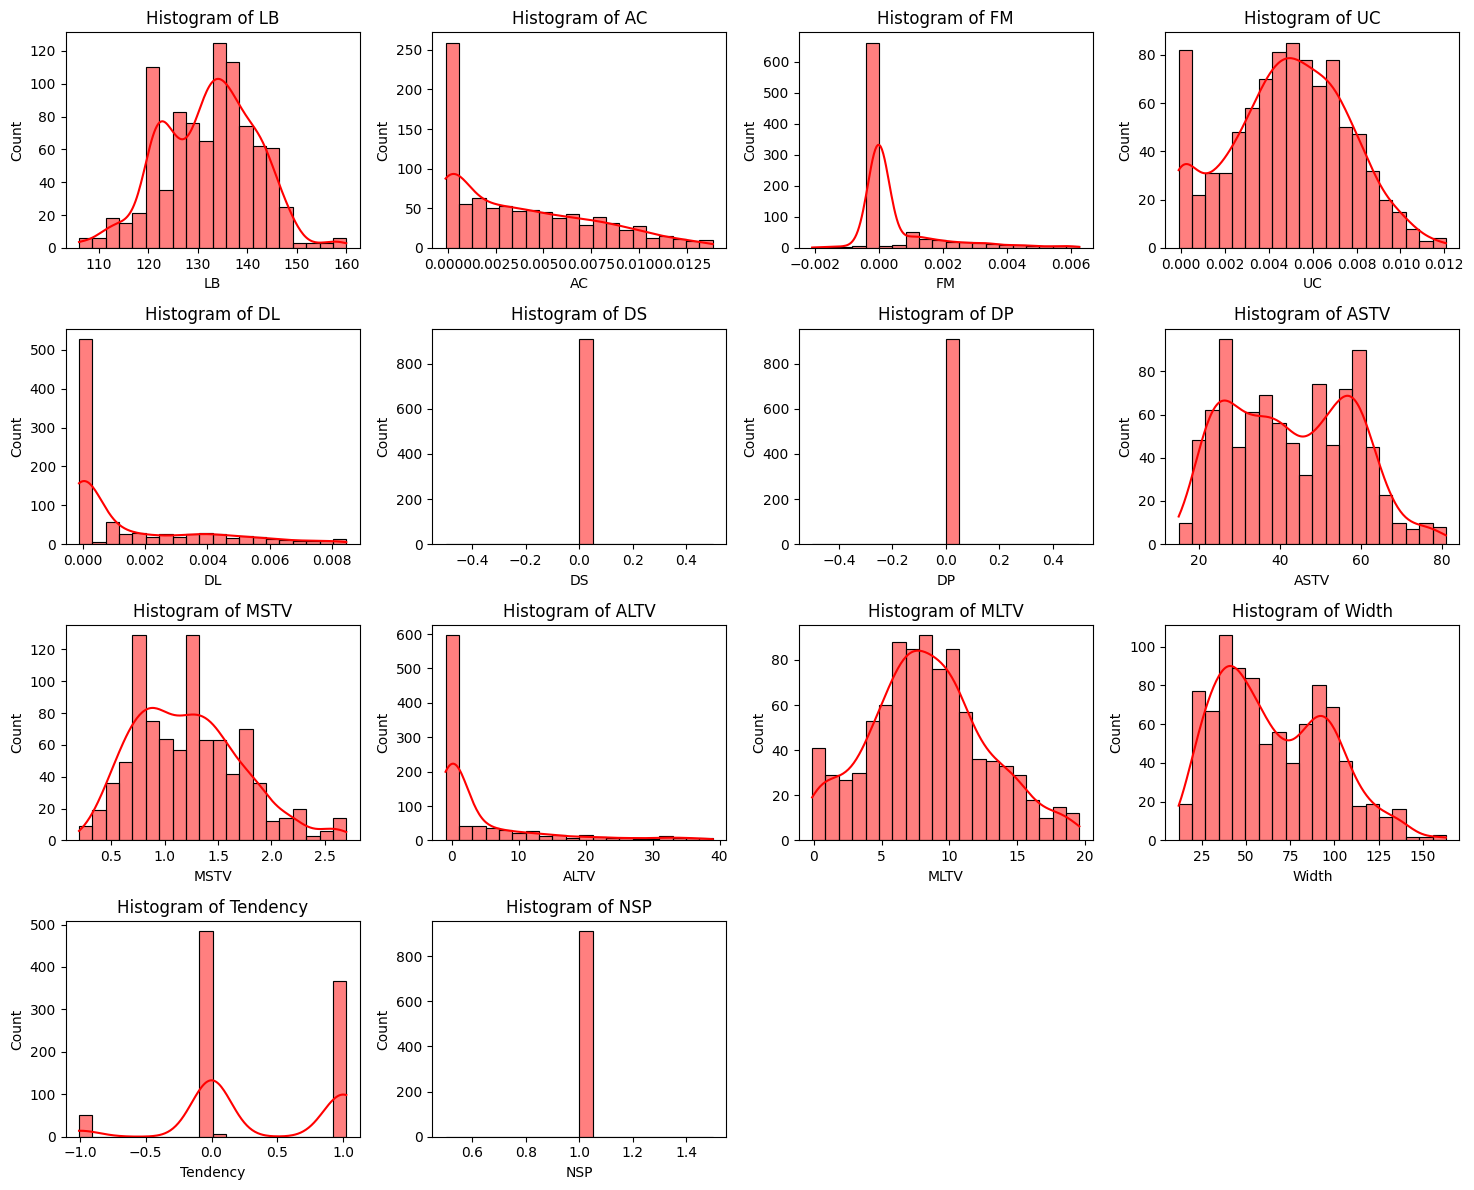

In [14]:
# Histogram
plt.figure(figsize=(15, 12))
for i, col in enumerate(df_col):
    plt.subplot(4, 4, i+1)  # adjust rows/columns as needed
    sns.histplot(df[col], kde=True, bins=20,color='red')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


### Histogram Interpretation:
- Most features show roughly normal distributions.
- Some variables like ASTV and ALTV are slightly right-skewed, indicating a few higher extreme values.
- Features like LB and AC are concentrated around specific ranges, suggesting stable readings.


●	Use bar charts or pie charts to display the frequency of categories for categorical variables.
* As there are no categorical columns in the given dataset.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910 entries, 1 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        910 non-null    float64
 1   AC        910 non-null    float64
 2   FM        910 non-null    float64
 3   UC        910 non-null    float64
 4   DL        910 non-null    float64
 5   DS        910 non-null    float64
 6   DP        910 non-null    float64
 7   ASTV      910 non-null    float64
 8   MSTV      910 non-null    float64
 9   ALTV      910 non-null    float64
 10  MLTV      910 non-null    float64
 11  Width     910 non-null    float64
 12  Tendency  910 non-null    float64
 13  NSP       910 non-null    float64
dtypes: float64(14)
memory usage: 106.6 KB


●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
  ## Heat map

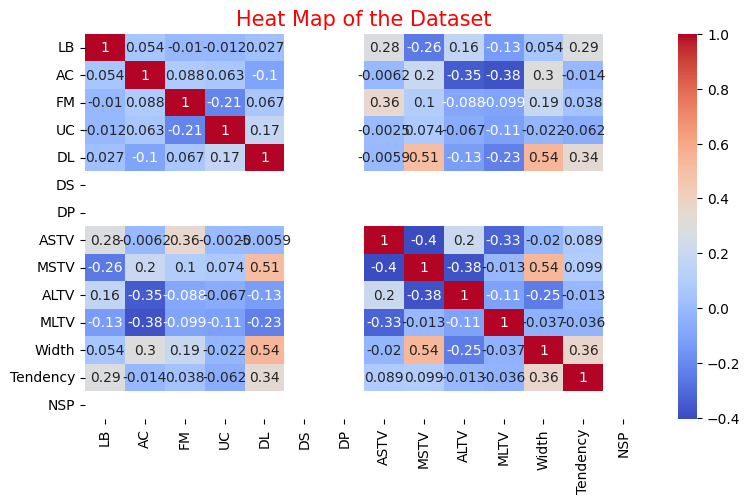

In [16]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Heat Map of the Dataset',color='red',size=15)
plt.show()

### Heat Map Interpretation:
- ASTV and ALTV show strong positive correlation, both representing variability features.
- DL, DS, and DP show weak correlations with other variables — they may not contribute much to predictive models.


●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

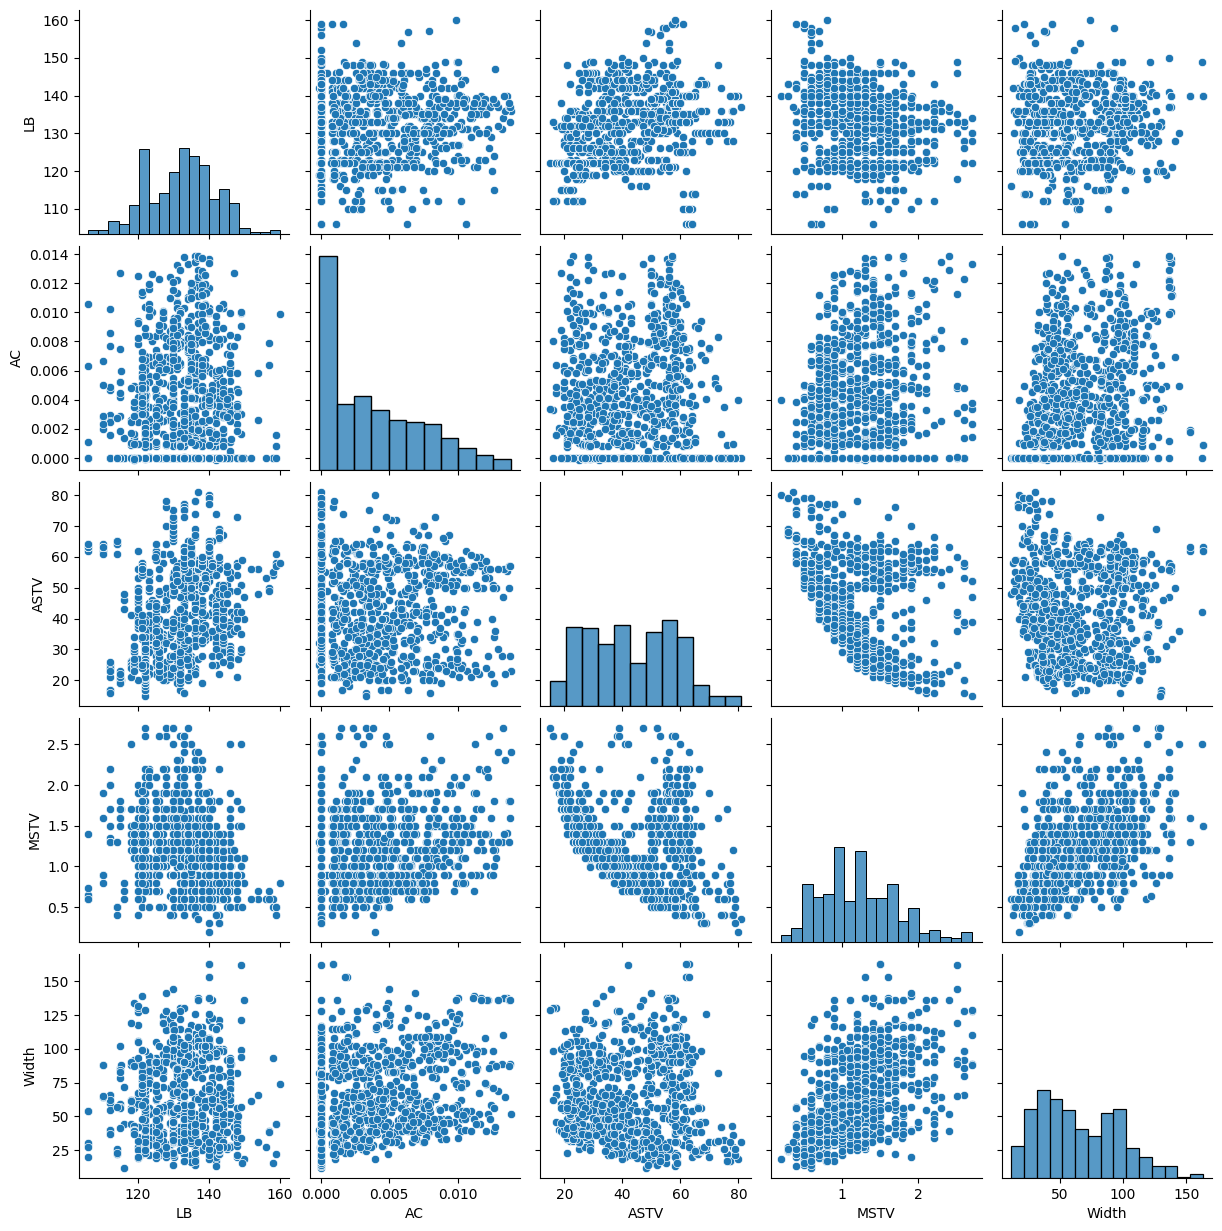

In [17]:
sns.pairplot(df[['LB','AC','ASTV','MSTV','Width']])
# plt.title('Pairplot',color='red',size=10)
plt.show()

### Pair plot Interpretation:
- The pairplot shows visible linear relationships between ASTV and Width, and between LB and AC.
- These indicate potential dependencies useful for feature selection.


# 4.	Pattern Recognition and Insights:
●	Identify any correlations between variables and discuss their potential implications.
Correlation measures how two variables move together. For numerical data, we usually use Pearson correlation (values between -1 and 1):

+1 → perfect positive correlation (both increase together)

0 → no linear correlation

-1 → perfect negative correlation (one increases, the other decreases)


In [18]:
df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,0.054132,-0.010216,-0.011761,0.027015,NaN,NaN,0.284166,-0.255089,0.163136,-0.130745,0.053903,0.289608,NaN
AC,0.054132,1.000000,0.087633,0.063482,-0.101209,NaN,NaN,-0.006208,0.196181,-0.350434,-0.381217,0.301577,-0.013614,NaN
FM,-0.010216,0.087633,1.000000,-0.212901,0.066852,NaN,NaN,0.357578,0.103872,-0.088343,-0.099090,0.190487,0.037904,NaN
UC,-0.011761,0.063482,-0.212901,1.000000,0.174646,NaN,NaN,-0.002459,0.074328,-0.067402,-0.114891,-0.021721,-0.062210,NaN
DL,0.027015,-0.101209,0.066852,0.174646,1.000000,NaN,NaN,-0.005897,0.509614,-0.128952,-0.233365,0.544028,0.340486,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,0.284166,-0.006208,0.357578,-0.002459,-0.005897,NaN,NaN,1.000000,-0.403849,0.201272,-0.326210,-0.020073,0.089287,NaN
MSTV,-0.255089,0.196181,0.103872,0.074328,0.509614,NaN,NaN,-0.403849,1.000000,-0.377292,-0.012897,0.536096,0.098754,NaN
ALTV,0.163136,-0.350434,-0.088343,-0.067402,-0.128952,NaN,NaN,0.201272,-0.377292,1.000000,-0.111025,-0.245596,-0.012741,NaN


●	Look for trends or patterns over time if temporal data is available.

Variability-based features (ASTV, ALTV, MLTV, MSTV) capture temporal patterns in heart rate.

High ASTV is often associated with abnormal fetal states, while low MSTV indicates reduced short-term variability.

# 5.	Conclusion:
●	Summarize the key insights and patterns discovered through your exploratory analysis.

-- The analysis showed that variability-related features (ASTV, MSTV, ALTV, MLTV) hold the most valuable  patterns for understanding fetal health.

-- Some features (DS, DP, Tendency, NSP) lost variability after outlier handling, making them less useful for further analysis.

●	Discuss how these findings could impact decision-making or further analyses.

-- Future modeling should focus more on variability features (ASTV, MSTV, ALTV, MLTV) since they carry stronger predictive signals.

-- Features with no variability (DS, DP, Tendency, NSP) may need to be excluded or carefully re-evaluated to avoid misleading results.

### Final Conclusion:

- 1. After handling missing values and removing outliers, the dataset became more balanced with reduced noise.
- 2. Several variability features (ASTV, ALTV, MSTV, MLTV) showed strong influence and correlations — they may be key predictors of fetal health.
- 3. Some columns (DS, DP, Tendency, NSP) became constant after outlier removal and offer little information; these can be dropped in modeling.
- 4. The data is now ready for feature scaling and model training, with a cleaner structure and fewer distortions.
